In [1]:
# from helpers.experiments_utils import wrapper
from sympy import *
import numpy as np
import pandas as pd

from other_models.direct_lingam.simulate_data import get_Lambda
from other_models.direct_lingam.DAG import plot_dag
from helpers.models import IV
from helpers.experiments_utils import wrapper, SimulationSettings

Lambda is 
 [[0 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 1 0]]


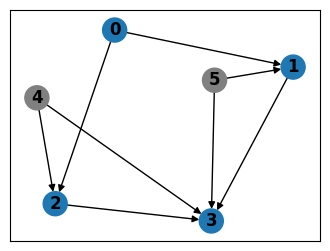

In [2]:
adjacency_obs = get_Lambda([(1,0), (2,0), (3, 1), (3, 2)], 4)
print(f"Lambda is \n {adjacency_obs}")
adjacency_latent = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
highest_l = 1
adjacency = np.hstack((adjacency_obs, adjacency_latent))
plot_dag(adjacency) # Latent nodes are grey

# Gamma

In [ ]:
settings = SimulationSettings(
    highest_l=highest_l,
    adjacency_obs=adjacency_obs,
    adjacency_latent=adjacency_latent,
    noise_distribution='gamma'
)

df = wrapper(100,
        settings = settings,
        model_class = IV,
        methods = ['Cumulant', 'Min Norm', 'Relvlingam', 'GRICA'],
        location_interest=((3, 1), (3, 2)))

df.to_csv('results/gamma_IV.csv')

# Beta

In [ ]:
settings.noise_distribution = 'beta'

df = wrapper(100,
        settings = settings,
        model_class = IV,
        methods = ['Cumulant', 'Min Norm', 'Relvlingam', 'GRICA'],
        location_interest=((3, 1), (3, 2)))

df.to_csv('results/beta_IV.csv')